#### Used Logistic Regression to determine whether a diagnosed breast cancer tumor is Benign or Malignant

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

#### Read the data and split data into independent (X) and dependent (y) variable

In [100]:
options = {
    'delimiter': ',',
    'header': None,
    'names': ['code_number', 'thickness', 'u_cell_size', 'u_cell_shape', 
              'adhesion', 'e_cell_size', 'nuclei', 'chromatin', 'nucleoli', 
              'mitoses', 'class']
}
data = pd.read_csv('breast-cancer-wisconsin.data', **options)
data = data.replace('?', np.nan).dropna()
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values
print(f'Length of data: {len(data)}')
data

Length of data: 683


,code_number,thickness,u_cell_size,u_cell_shape,adhesion,e_cell_size,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


#### Split the data in training and test set. Create and train the model

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Print the confusion matrix and accuracy


Accuracy: 96.7 %

Standard Dev: 1.97 %


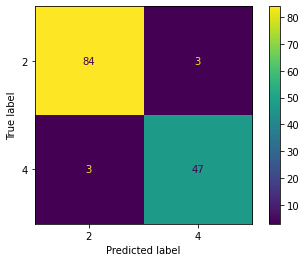

In [102]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot();
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
print(f'\nAccuracy: {round((accuracies.mean()*100),2)} %')
print(f'\nStandard Dev: {round((accuracies.std()*100),2)} %')

#### Save the model

In [103]:
import pickle
with open('breast_cancer_predict.pkl', 'wb') as file:
    pickle.dump(model, file)